In [36]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot']

## Data Reshape

In [40]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

## Data Normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [41]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

## Split the data into train-test-validation datasets
In the earlier step of improting the date, we had 60,000 datasets for training and 10,000 tets datasets. Now we further train/validation. Here is how each type of dataset is used in deep learning.
- **Training data-** used for training the model
- **Validation data-** used for tuning the hyperparameters and evaluate the models
- **Test data-** used to test the model after the model has gone through initial vetting by the validation set.

In [42]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

## Create the model architecture

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

## Create the model

### Comparison - Pooling vs Without Pooling

In [44]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation = 'relu'))
model_a.add(keras.layers.Dense(100, activation = 'relu'))
model_a.add(keras.layers.Dense(10, activation = 'softmax'))

# Without Pooling Layer
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation = 'relu'))
model_b.add(keras.layers.Dense(100, activation = 'relu'))
model_b.add(keras.layers.Dense(10, activation = 'softmax'))

In [46]:
model_a.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 300)               1622700   
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                      

In [47]:
model_b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_3 (Flatten)         (None, 21632)             0         
                                                                 
 dense_9 (Dense)             (None, 300)               6489900   
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 6521330 (24.88 MB)
Trainable params: 6521330 (24.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model_a.compile(loss = 'sparse_categorical_crossentropy',
          optimizer = 'sgd',
             metrics = ['accuracy'])
model_b.compile(loss = 'sparse_categorical_crossentropy',
          optimizer = 'sgd',
             metrics = ['accuracy'])

In [49]:
model_history_a = model_a.fit(X_train, y_train, epochs = 3, batch_size = 64,
                         validation_data = (X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 11s 13ms/step - loss: 0.8570 - accuracy: 0.7131 - val_loss: 0.7504 - val_accuracy: 0.7276
Epoch 2/3
860/860 [==============================] - 10s 11ms/step - loss: 0.5402 - accuracy: 0.8054 - val_loss: 0.4956 - val_accuracy: 0.8126
Epoch 3/3
860/860 [==============================] - 9s 11ms/step - loss: 0.4817 - accuracy: 0.8259 - val_loss: 1.0067 - val_accuracy: 0.6880


In [50]:
model_history_b = model_b.fit(X_train, y_train, epochs = 3, batch_size = 64,
                         validation_data = (X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 27s 30ms/step - loss: 0.7454 - accuracy: 0.7437 - val_loss: 0.7416 - val_accuracy: 0.7306
Epoch 2/3
860/860 [==============================] - 26s 31ms/step - loss: 0.4966 - accuracy: 0.8224 - val_loss: 0.4688 - val_accuracy: 0.8266
Epoch 3/3
860/860 [==============================] - 26s 31ms/step - loss: 0.4410 - accuracy: 0.8404 - val_loss: 1.0189 - val_accuracy: 0.6902


AttributeError: 'function' object has no attribute 'set_ylim'

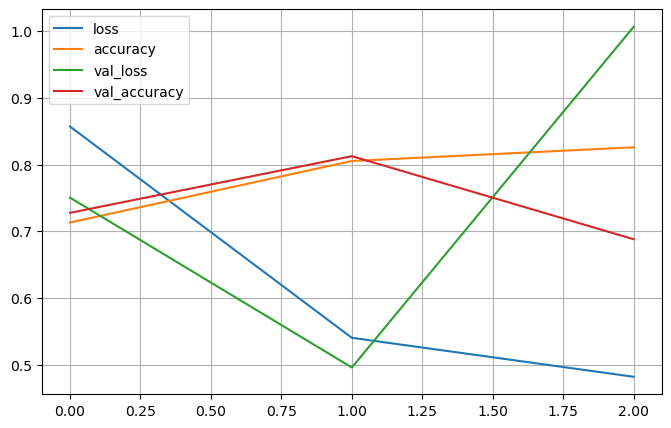

In [51]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca.set_ylim(0, 1)
plt.show()

AttributeError: 'function' object has no attribute 'set_ylim'

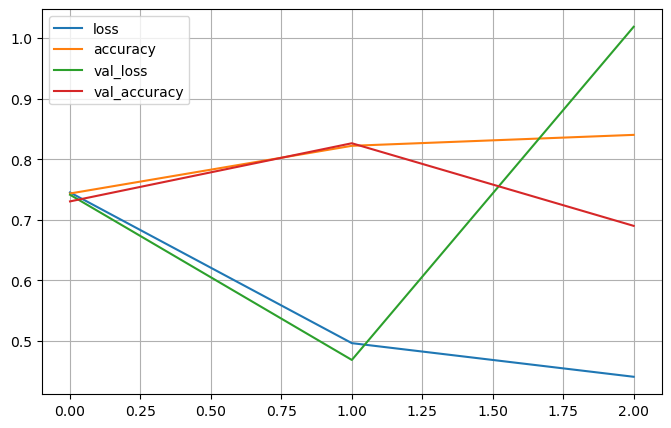

In [52]:
import pandas as pd

pd.DataFrame(model_history_b.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca.set_ylim(0, 1)
plt.show()

In [26]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.8995


In [27]:
ev

[0.28536656498908997, 0.8995000123977661]

In [28]:
X_new = X_test[:3]

In [33]:
y_probs = model.predict(X_new)
y_pred = np.argmax(y_probs, axis=1)
y_pred

1/1 [==============================] - 0s 275ms/step


array([9, 2, 1], dtype=int64)

In [34]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(size=(28, 28))


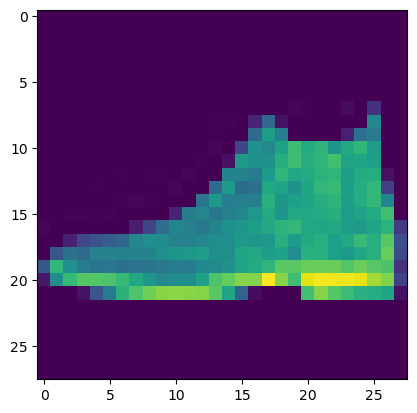

In [35]:
print(plt.imshow(X_test[0].reshape((28, 28))))

In [ ]:
keras.backend.clear_session

In [ ]:
del model